# Python for (open) Neuroscience

_Lecture 2.1_ - Real world Python on real world data 

Luigi Petrucco

Jean-Charles Mariani

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/lectures/Lecture2.0_Real-world-Python.ipynb)

## Notebooks

Finally, what are notebooks?

`Jupyter` notebooks: interactive Python development platform based on a browser interface (The whole thing is powered by some python and javascript code that is provided by the `Jupyter` project)

![folderschema](./files/folderschema-08.png)

### The user interface

The user interface we see is a browser page divided in markdown cells (for comments) and Python code cells

![folderschema](./files/folderschema-09.png)

### The python kernel

A notebook is always executing code using its *kernel*, just a fancy word to call **a Python session opened using the Python interpreter** from one of your environments (depending on the configuration of the notebook).

![folderschema](./files/folderschema-10.png)

Notebooks run in a browser but are **NOT** running online if you launch `jupyter notebook` from the terminal! 

Relying on the browser is a convenient way to have a nice graphical interface where you can divide and execute code in separated cells, add markdown comments, show plots, etc.

Also, the same notebook can run online on remote computing platforms (e.g., colab). One of the nice things about notebooks!

Each notebook interacts with a new Python session! You can open more notebooks after you run jupyter, but each of them will open a new Python kernel, so it won't see the variables and code defined in another notebook!

Practical 2.1.0: 

 - open jupyter from the terminal invoking `jupyter notebook` (from your `base` environment)
 - create a new notebook, selecting the `course-env` environment. Write a simple `test_function` function that prints `hallo` in that notebook.
 - open a second notebook using the same environment, and try to use `test_function` function without defining it. Can you do that?

### Share code across notebooks

There are multiple ways of making code available across notebooks (we can have a lecture on how to organize your code in a package). 

The easiest is to put all functions you want to import from one notebook to the other in a python `.py` file in the same folder as the notebook, and to import the functions from there.

Practical 2.1.1: 

 - Open a new text file in the folder where you created the two notebooks. You can do it in jupyter  "New" > "Text file"
 - Rename the file something like `utils.py` (the `.py` extension here is important!), and save it!
 - Restart the notebook kernel ("Kernel" > "Restart")
 - You can now import from the file! 
 ```python
import utils as ut
ut.test_function
```
- Import the custom function and run it

## Working with the filesystem

The first important skill when you start working with your local data!

###  `Path` objects

The fundamental tool for working with the filesystem is the `Path` class from the `pathlib` module.

(You can find people doing it using the `os` module, but it is old and not recommended as of 2023)

In [1]:
from pathlib import Path

A `Path` object is initialized with a string indicating a location:

In [77]:
a_path = Path("/Users/vigji/code")
# Note 1: to run those examples on your machine, you have to change the path strings!
# Note 2: in windows backslashes are problematic! To fix, start string with r (for "raw-string"):
# a_windows_path = Path(r"C:\Users\vigji\code")

We can define a Path object with a non-existing path, but we can check if a path exists using the exist() method:

In [72]:
a_path = Path("/Users/vigji/code/python-cimec/lectures/Lecture1.0_Numpy-intro.ipynb")
print(a_path.exists())

True


In [74]:
a_wrong_path = Path("/Users/pippo")
print(a_wrong_path.exists())

False


`Path` objects have some useful attributes:

In [75]:
file_path.name  # name of the file (string)

'Lecture1.0_Numpy-intro.ipynb'

In [76]:
file_path.stem  # name of the file without extension (string)

'Lecture1.0_Numpy-intro'

In [79]:
file_path.parent  # folder containing the file (Path object)

PosixPath('/Users/vigji/code/python-cimec/lectures')

### `glob()` and regular expressions

We can browse the filesystem using the `.glob()` method. `.glob()` finds all files in the folder from which it is called that match a specific pattern.

The pattern we pass to `glob()` is a so-called <span style="color:indianred">regular expression</span> (or regex). Regular expressions are strings that we can use to specify the features of the string we are looking for.

The most common one is the symbol for "any string": `*`. If we just put `*` in our regular expression, we get any possible string match, that is to say, the whole content of the folder:

In [21]:
a_path = Path("/Users/vigji/code/python-cimec/lectures")

for path in a_path.glob("*"):  # match all files in the folder
    print(path)

/Users/vigji/code/python-cimec/lectures/Lecture1.0_Numpy-intro.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.4_More-pandas-plotting.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture2.1_Real-world-data.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.2_Controls-style-functions.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.0.1_Python-syntax.ipynb
/Users/vigji/code/python-cimec/lectures/.DS_Store
/Users/vigji/code/python-cimec/lectures/Lecture1.2_Intro-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/rise.css
/Users/vigji/code/python-cimec/lectures/Lecture1.1_Numpy.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.3_More-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.1_Containers-controls.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.3_Functions.ipynb
/Users/vigji/code/python-cimec/lectures/files
/Users/vigji/code/python-cimec/lectures/Lecture2.0_Real-world-python.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.0.0_Introd

We can create more complicated patterns to look for specific files, or files with a word in the name. 

For example, to look for all jupyter notebooks here (extension `".ipynb"`), we can write:

In [26]:
# match all paths in the folder whose name finishes with .md (and starts with anything):
for path in sorted(a_path.glob("*.ipynb")):
    print(path)

/Users/vigji/code/python-cimec/lectures/Lecture0.0.0_Introduction.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.0.1_Python-syntax.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.1_Containers-controls.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.2_Controls-style-functions.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.3_Functions.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.4_Classes-objects.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.0_Numpy-intro.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.1_Numpy.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.2_Intro-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.3_More-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.4_More-pandas-plotting.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture2.0_Real-world-python.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture2.1_Real-world-data.ipynb


Or to look at all files of the second module - whose name starts with `"Lecture1."`:

In [28]:
# match all paths in the folder whose name starts with python and (finishes with anything):
for path in a_path.glob("Lecture1.*"):
    print(path)

/Users/vigji/code/python-cimec/lectures/Lecture1.0_Numpy-intro.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.4_More-pandas-plotting.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.2_Intro-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.1_Numpy.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.3_More-pandas.ipynb


Or look at all files whose name contains `"pandas"`:

In [35]:
# match all paths in the folder whose name contains pandas (could find anything before and after):
for path in a_path.glob("*pandas*"):
    print(path)

/Users/vigji/code/python-cimec/lectures/Lecture1.4_More-pandas-plotting.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.2_Intro-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.3_More-pandas.ipynb


If we want to look if a path is a folder (as opposed to a file name), we can use the `.isdir()` method:

In [37]:
# match all paths in the folder that are folders:
for path in a_path.glob("*"):
    if path.is_dir():
        print(path)

/Users/vigji/code/python-cimec/lectures/files
/Users/vigji/code/python-cimec/lectures/.ipynb_checkpoints


We can include subfolders in our search using `.rglob()` (short for recursive `.glob()`)

In [60]:
# match all paths in the folder and its subfolders:
for path in a_path.rglob("*"):
    print(path)

/Users/vigji/code/python-cimec/lectures/Lecture1.0_Numpy-intro.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.4_More-pandas-plotting.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture2.1_Real-world-data.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.2_Controls-style-functions.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.0.1_Python-syntax.ipynb
/Users/vigji/code/python-cimec/lectures/.DS_Store
/Users/vigji/code/python-cimec/lectures/Lecture1.2_Intro-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/rise.css
/Users/vigji/code/python-cimec/lectures/Lecture1.1_Numpy.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.3_More-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.1_Containers-controls.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.3_Functions.ipynb
/Users/vigji/code/python-cimec/lectures/files
/Users/vigji/code/python-cimec/lectures/Lecture2.0_Real-world-python.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.0.0_Introd

Note that `.glob()` does not return a list, but a `generator` object - we can loop on a generator, but not index it!

In [61]:
first_file = a_path.glob("*")[0]  # this will give an error as a generator is not subscriptable

TypeError: 'generator' object is not subscriptable

If you want to index a file path, you have to convert the result to list first!

In [62]:
first_file = list(a_path.glob("*"))[0] 

Also, note that you can't count on the files to be sorted. This can be [very important to remember](https://discuss.python.org/t/a-code-glitch-may-have-caused-errors-in-more-than-100-published-studies/2583/3)!

If you want some sorting, you should do it yourself (e.g. using the `sorted()` function):

In [63]:
for path in sorted(a_path.glob("*")):  # alphabetically sorted() files
    print(path)

/Users/vigji/code/python-cimec/lectures/.DS_Store
/Users/vigji/code/python-cimec/lectures/.ipynb_checkpoints
/Users/vigji/code/python-cimec/lectures/Lecture0.0.0_Introduction.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.0.1_Python-syntax.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.1_Containers-controls.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.2_Controls-style-functions.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.3_Functions.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture0.4_Classes-objects.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.0_Numpy-intro.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.1_Numpy.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.2_Intro-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.3_More-pandas.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture1.4_More-pandas-plotting.ipynb
/Users/vigji/code/python-cimec/lectures/Lecture2.0_Real-world-python.ipynb
/Users/vigji/code/pytho

### Concatenating paths

We can use the `/` operator to concatenate parts of the path **independently from the OS we are on**. This is because here we use `/` as a python operator, **not as a string**! `pathlib` will know what are the OS requirements for slashes.

In [68]:
a_path = Path("/Users/vigji/code/python-cimec")
a_path / "lectures"  # this will work regardless of the OS

PosixPath('/Users/vigji/code/python-cimec/lectures')

### Create folders

`Path` objects can be used to write new directories in the filesystem using `.mkdir()`. It throws an error if the folder exists, unless we specify `exist_ok=True` argument:

In [70]:
a_path = Path("/Users/vigji/new_folder")
a_path.mkdir(exist_ok=True)

### Move files

We can use the `.replace()` method of a path to move a file to a new location that we pass as input to the method. 

In [83]:
a_path = Path("/Users/vigji/new_container_folder")
a_path.mkdir(exist_ok=True)

path_to_move = Path("/Users/vigji/new_folder")
path_to_move.mkdir(exist_ok=True)
new_path = path_to_move.replace(a_path / path_to_move.name)

## Automatically organize data folders

Every time you end up manually moving and renaming files, consider doing it programmatically!

In [99]:
data_folder = Path("/Users/vigji/sample_data_folder")  # original data folder
new_data_folder = Path("/Users/vigji/reorganized_data_folder")  # new reorganized folder
new_data_folder.mkdir(exist_ok=True)

for file in data_folder.glob("*"):
    subject, session = file.stem.split("_")  # remove extension and separate using _
    new_location = new_data_folder / subject / session  # create new path using subject and session
    new_location.mkdir(exist_ok=True, parents=True)  # if necessary, create also parent folder
    
    file.replace(new_location / file.name)  # move the file

You can also automatically create dataframes from the filesystem structure as we go! (in the practical)

(Practicals 2.1.2)

## Working with images

When we work with any kind of image, or stacks of images, we have to think about them as matrices of numbers. Numbers map the intensity of the signal at every pixel.

There are countless libraries to work with images, depending on your field and the kind of images you are working on!! Here we will mention some general properties of them all, but the specifics will depend a lot on the actual data and libraried you are working with!

In [45]:
# To use the library, first `pip install imageio` from the terminal
import imageio as imo
from matplotlib import pyplot as plt
import numpy as np

### Image readers

In most cases, image readers will create an image object that encapsulate both the image data and its metadata. 

In [37]:
img = imo.read("./files/octopus.jpg")  # this creates an image object

In [32]:
img

Metadata have different degrees of sofistication depending on where your image is from. Often your data acquisition devices save images with a bunch of parameters about the acquisition, that are kept in the image metadata.

Here we just have some info about the file:

In [39]:
img.get_meta_data()

{'jfif': 258,
 'jfif_version': (1, 2),
 'jfif_unit': 0,
 'jfif_density': (1, 1),
 'mode': 'RGB',
 'shape': (1200, 900)}

Your reader will then have a method to retrieve the actual image data as an array. The shape of the data will depend on your specific data.


In [48]:
# this reader assumes that this can be a multi-image stack, so we have to specify an index to get an image
data_array = img.get_data(0)

If the image is a plain 2D, monocromatic image, the data is a (height, width) matrix.

Additional dimensions can encode:
 - **different channels** (typically 3 for RGB images, 4 for RGBA images (with transparency), but depends on the data)
 - **the depth** (if the data is volumetric)
 - **the time axis** (if the data is acquired through time as in a video)

In our case, the shape will be (heigth, width, channels):

In [52]:
data_array.shape

(900, 1200, 3)

## The image bit depth

Each pixel is encoded with a specific number of bits! (Remember lecture 0.0.1)

The higher the number of bits, the more possible values the image pixel can have, but the heavier your data will be.

The number of bits that encode each pixel is called the bit depth of the image! 

Typical depths are either 8 (values from 0 to 255) or 16 (values from 0 to 65535).

The bit depth will correspond with the dtype of our array! In our case:

In [54]:
data_array.dtype

dtype('uint8')

Let's have a look at each channel in our imaging data!

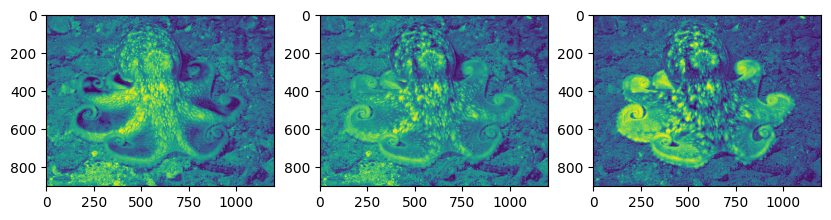

In [58]:
f, axs = plt.subplots(1, 3, figsize=(10, 3))

for channel_i, (ax, title) in enumerate(zip(axs, ["Red", "Green", "Blue"])):
    ax.imshow(data_array[:, :,channel_i])

If we pass a 3D array with 3 elements over the third axis to imshow, it will assume it is an RGB image and represent it as such!

<Figure size 640x480 with 0 Axes>

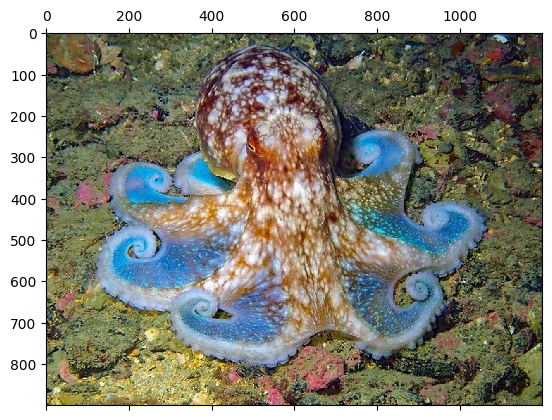

In [62]:
plt.figure()
plt.matshow(img_data)

(Practicals 2.1.3)

(End of lecture - code below to create the example data structure)

In [97]:
data_folder = Path("/Users/vigji/sample_data_folder")
path_to_move.mkdir(exist_ok=True)

for subject_i in range(3):
    for session_i in range(4):
        with open(data_folder / f"sub{subject_i}_ses{session_i}.data", "w") as f:
            f.write("a")
        with open(data_folder / f"sub{subject_i}_ses{session_i}.metadata", "w") as f:
            f.write("a")